Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset

In [54]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
adult = pd.read_csv('../5_SVMdataPreprocessing/adult.csv')
print(adult)

       age         workclass  fnlwgt     education  educational-num  \
0       25           Private  226802          11th                7   
1       38           Private   89814       HS-grad                9   
2       28         Local-gov  336951    Assoc-acdm               12   
3       44           Private  160323  Some-college               10   
4       18                 ?  103497  Some-college               10   
5       34           Private  198693          10th                6   
6       29                 ?  227026       HS-grad                9   
7       63  Self-emp-not-inc  104626   Prof-school               15   
8       24           Private  369667  Some-college               10   
9       55           Private  104996       7th-8th                4   
10      65           Private  184454       HS-grad                9   
11      36       Federal-gov  212465     Bachelors               13   
12      26           Private   82091       HS-grad                9   
13    

Cleaning the data

In [51]:
adult = adult.replace ("?", 0)
print(adult)

       age         workclass  fnlwgt     education  educational-num  \
0       25           Private  226802          11th                7   
1       38           Private   89814       HS-grad                9   
2       28         Local-gov  336951    Assoc-acdm               12   
3       44           Private  160323  Some-college               10   
4       18                 0  103497  Some-college               10   
5       34           Private  198693          10th                6   
6       29                 0  227026       HS-grad                9   
7       63  Self-emp-not-inc  104626   Prof-school               15   
8       24           Private  369667  Some-college               10   
9       55           Private  104996       7th-8th                4   
10      65           Private  184454       HS-grad                9   
11      36       Federal-gov  212465     Bachelors               13   
12      26           Private   82091       HS-grad                9   
13    

In [48]:
adult.replace ( "? ", np.nan)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [13]:
for keys in adult.keys() :
    print(keys)

age
workclass
fnlwgt
education
educational-num
marital-status
occupation
relationship
race
gender
capital-gain
capital-loss
hours-per-week
native-country
income


In [21]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


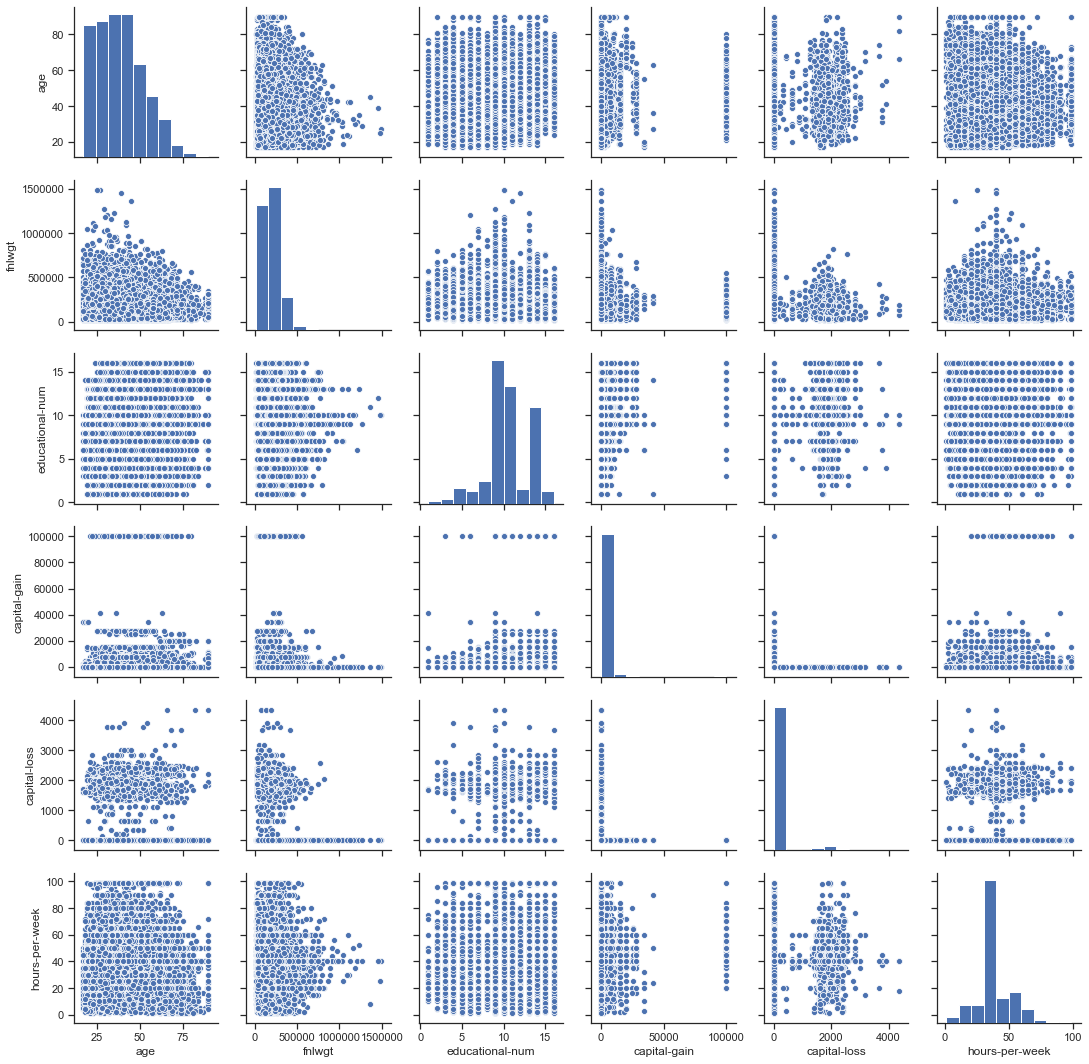

In [57]:
#sns.pairplot(db,hue=“gender”)
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(adult)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)